# Statistics for housing agency in Boston

#### Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - %lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### I will rename the columns I will use in order to make code and graphs more readible

In [3]:
boston_df = boston_df.rename(columns={'MEDV': 'Median',
                        'CHAS': 'Bounded by Charles River', 
                        'NOX': 'Nitric oxide concentrations',
                        'INDUS': 'Non-Retail business acres per town',
                          'DIS': "Distance", 
                                     })

#### 1.Is there a significant difference in the median value of houses bounded by the Charles river or not?

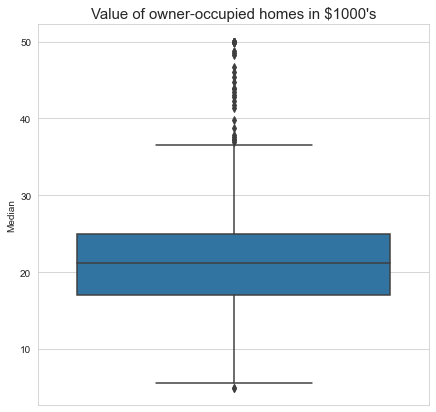

In [4]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(7,7))
sns.boxplot(y='Median', data= boston_df)
plt.title("Value of owner-occupied homes in $1000's", fontsize = 15)
plt.show()

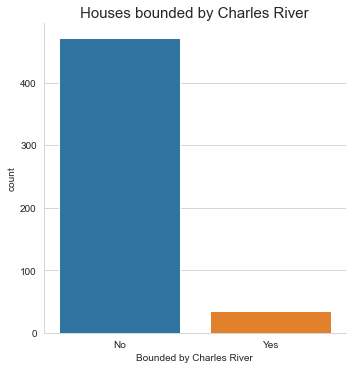

In [5]:
ax = sns.catplot(data = boston_df, x = 'Bounded by Charles River', kind='count')
ax.set_xticklabels(["No", "Yes",])
plt.title("Houses bounded by Charles River", fontsize = 15)
plt.show()

##### Hypothesis testing
* 𝐻_0:µ_1=µ_2  ("there is no difference in median values between prices of houses bounded by the river or not")
* 𝐻_1:µ_1≠µ_2  ("there is a difference in median values between prices of houses bounded by the river or not")

##### Checking if their is equality of variance

In [6]:
scipy.stats.levene(boston_df[boston_df['Bounded by Charles River'] == 1]['Median'],
                   boston_df[boston_df['Bounded by Charles River'] == 0]['Median'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since pvalue is smaller then 0.05 we cannot assume equality of variance and we need to conduct Welsh t-test instead of student t-test.

###### Running t-test to determine validity of hypothesis

In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['Bounded by Charles River'] == 1]['Median'],
                   boston_df[boston_df['Bounded by Charles River'] == 0]['Median'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

#### Pvalue is smaller then 0.05 so we can reject null hyphotesis and conclude that there is significant difference in the median value of houses bounded by the Charles river or not bounded by it

#### 2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&((boston_df['AGE']) < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

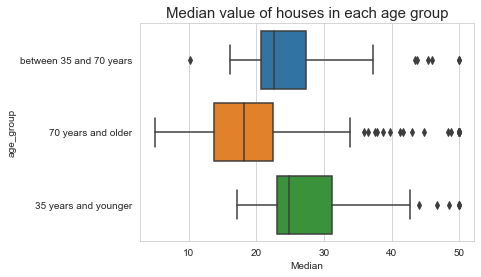

In [17]:
ax = sns.boxplot(x = 'Median', y = 'age_group', data = boston_df)
plt.title("Median value of houses in each age group", fontsize = 15)
plt.show()

##### Hypothesis testing
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population medians are equal)
*   $H\_1:$ At least one of the medians differ

In [10]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['Median'], 
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['Median'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['Median'], center ='mean' ) 
# Since p-value is bigger then 0.05 then variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [11]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['Median']
thirty_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['Median']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['Median']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirty_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Pvalue is smaller then 0.05 so we can reject null hyphotesis and conclude that at least one of median house values in each proportion differs

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

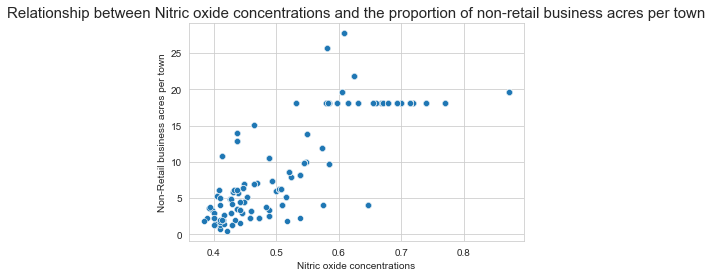

In [18]:
ax = sns.scatterplot(x='Nitric oxide concentrations', y='Non-Retail business acres per town', data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town", fontsize = 15)
plt.show()

There is positive relationship between nitric oxide concentrations and non-retail business acres per town at a first glance

*   $H\_0:$ No relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
*   $H\_1:$ There is relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

In [14]:
scipy.stats.pearsonr(boston_df['Nitric oxide concentrations'], boston_df['Non-Retail business acres per town'])

(0.7636514469209157, 7.913361061233745e-98)

#### We reject null hyphothesis. Pearson R equals to 0.76 so it is rather strong positive relationship between Niric oxide concentrations and the proportion of non-retail business acres per town

#### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [15]:
X = boston_df['Median']
y = boston_df['Distance']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.21e-08
Time:                        11:14:16   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
Median         0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

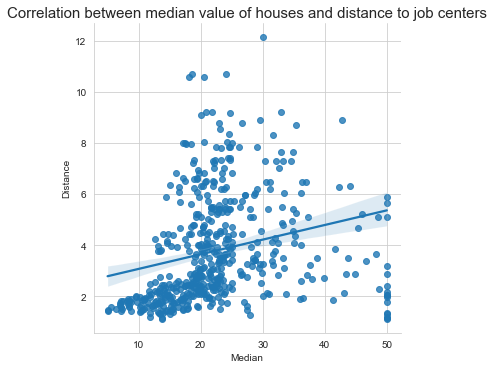

In [19]:
ax = sns.lmplot(x="Median", y="Distance", data=boston_df)
plt.title("Correlation between median value of houses and distance to job centers", fontsize = 15)
plt.show()

#### R-square is 0.062, so Person's R is 0.25. In conclusion there is rather weak positive correlation between median prices and distance to five Boston employment centers